In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import threading
import DobotDllType as dType
import math
from sklearn.cluster import KMeans

In [2]:
# Start the game
# play_game()

In [3]:
# Open a connection to the default camera (usually the first camera device found)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Error: Could not open camera.")

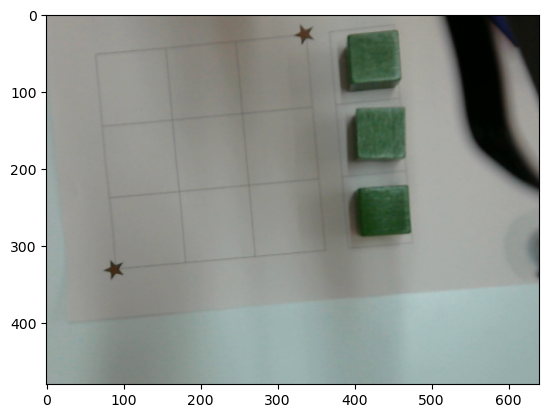

In [4]:
ret, frame = cap.read()
main_image = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
plt.imshow(main_image)

In [5]:
# x,y,c = main_image.shape

# top_half = main_image[:int(x/2)]
# bot_half = main_image[int(x/2):]
# plt.imshow(bot_half)

In [6]:
# template_image = cv2.imread('star2.PNG', cv2.IMREAD_GRAYSCALE)
# plt.imshow(template_image)

In [7]:
# Initialize ORB detector
# orb = cv2.ORB_create()

# # Find keypoints and descriptors with ORB
# kp1, des1 = orb.detectAndCompute(template_image, None)
# kp2, des2 = orb.detectAndCompute(main_image, None)

# # Create a BFMatcher object with default parameters
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# # Match descriptors
# matches = bf.knnMatch(des1, des2, k=2)

# # Apply ratio test
# good_matches = []
# for m, n in matches:
#     # if m.distance < 0.8 * n.distance:
#     good_matches.append(m)

In [8]:
# for m, n in matches:
#     print(m.distance,n.distance)

In [9]:
# for match in good_matches:
#     print(match.distance, match.imgIdx, match.queryIdx, match.trainIdx)

In [10]:
# # Sort the good matches based on distance
# good_matches = sorted(good_matches, key=lambda x: x.distance)

# # Find the best two matches that are at least 30 pixels away from each other
# best_match_1 = None
# best_match_2 = None

# if len(good_matches) >= 2:
#     best_match_1 = good_matches[0]
#     pt1 = kp2[best_match_1.trainIdx].pt

#     for match in good_matches[1:]:
#         pt2 = kp2[match.trainIdx].pt
#         print(np.linalg.norm(np.array(pt1) - np.array(pt2)) )
#         if np.linalg.norm(np.array(pt1) - np.array(pt2)) >= 30:
#             best_match_2 = match
#             break
# else:
#     print("Less good matches found")
    
# if best_match_1 and best_match_2:
#     pt1 = kp2[best_match_1.trainIdx].pt
#     pt2 = kp2[best_match_2.trainIdx].pt

#     print(f"Best match 1 coordinates: {pt1}")
#     print(f"Best match 2 coordinates: {pt2}")

In [11]:
# # Draw the best two matches
# img_matches = cv2.drawMatches(template_image, kp1, main_image, kp2, [best_match_1, best_match_2], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# # Show matches
# plt.imshow(img_matches)
# plt.show()

## Template Matching

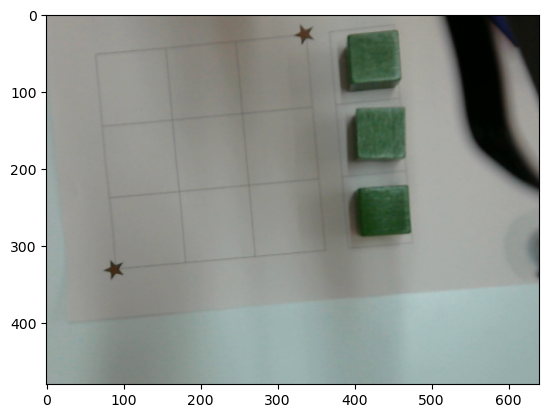

In [12]:
plt.imshow(main_image)

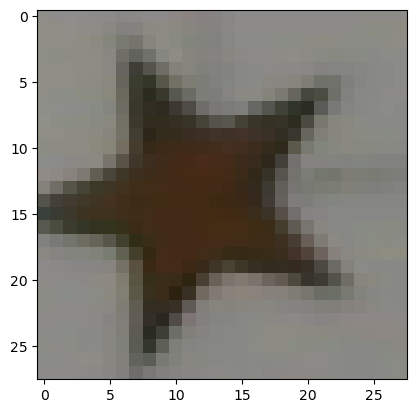

In [13]:
# Find the template from tbe image
template_pix_x = 317
template_pix_y = 77
template_size = 28

template = main_image[template_pix_x:template_pix_x+template_size, template_pix_y:template_pix_y+template_size]
plt.imshow(template)

In [14]:
# Perform template matching using cv2.matchTemplate
result = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

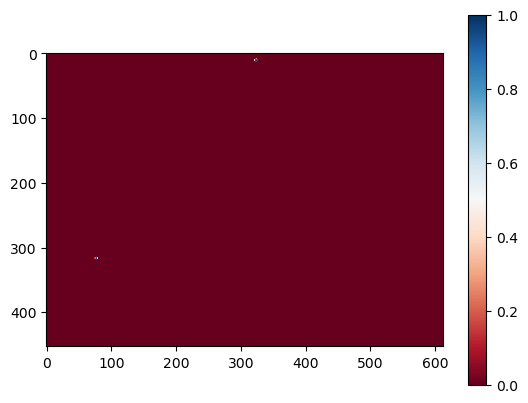

In [15]:
thresh = 0.8
result_filter = result >= thresh
plt.imshow(result_filter, cmap='RdBu')
plt.colorbar()

In [16]:
x, y = result_filter.shape
print(x,y)
pts = []
for i in range(x):
    for j in range(y):
        if result_filter[i,j] == 1:
            pts.append((j,i))

453 613


In [17]:
pts

[(324, 10),
 (322, 11),
 (323, 11),
 (324, 11),
 (325, 11),
 (322, 12),
 (323, 12),
 (324, 12),
 (325, 12),
 (322, 13),
 (323, 13),
 (324, 13),
 (325, 13),
 (76, 316),
 (77, 316),
 (78, 316),
 (75, 317),
 (76, 317),
 (77, 317),
 (78, 317),
 (79, 317),
 (76, 318),
 (77, 318),
 (78, 318)]

In [18]:
data = np.array(pts)

# Create a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans algorithm to the data
kmeans.fit(data)

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Round the centroid coordinates to the nearest integer
centroids_rounded = np.rint(centroids).astype(int)
refImage = centroids_rounded[np.argsort(centroids_rounded[:, 0])]
print("Centroid coordinates (rounded to the nearest integer):")
print(refImage)

C:\Users\21361535\AppData\Local\anaconda3\envs\opencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid coordinates (rounded to the nearest integer):
[[ 77 317]
 [324  12]]


C:\Users\21361535\AppData\Local\anaconda3\envs\opencv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
pos_cord = {}
def gen_cord(pt1, pt2):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]

    middle_x, middle_y = (x1 + x2) / 2, (y1 + y2) / 2

    size = abs(x1 - x2) / 3

    pos_cord[1] = ( middle_x - size, middle_y - size )
    pos_cord[2] = ( middle_x,        middle_y - size )
    pos_cord[3] = ( middle_x + size, middle_y - size )
    pos_cord[4] = ( middle_x - size, middle_y )
    pos_cord[5] = ( middle_x,        middle_y )
    pos_cord[6] = ( middle_x + size, middle_y )
    pos_cord[7] = ( middle_x - size, middle_y + size )
    pos_cord[8] = ( middle_x,        middle_y + size)
    pos_cord[9] = ( middle_x + size, middle_y + size)

def draw_circle(img, x, y):
    img_cpy = img.copy()
    cv2.circle(img_cpy, (int(x), int(y)), 5, (0, 255, 0), -1)
    return img_cpy

In [20]:
pt1, pt2 = refImage[0] + int(template_size/2), refImage[1] + int(template_size/2)

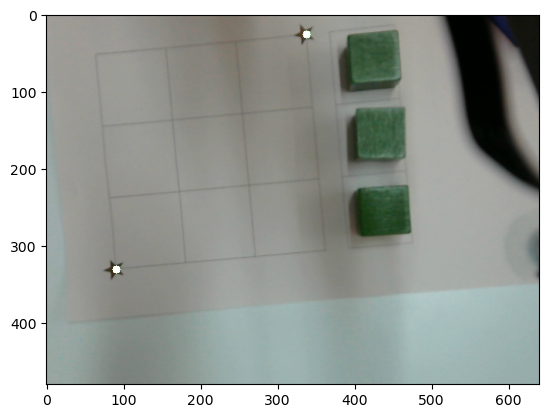

In [21]:
img_with_circles = main_image.copy()

img = draw_circle(img_with_circles, pt1[0], pt1[1])
img = draw_circle(img, pt2[0], pt2[1])

# for p in pts:
#     img[p[0],p[1]] = np.array([255,255,255,255])
plt.imshow(img)

In [22]:
gen_cord(pt1, pt2)

1


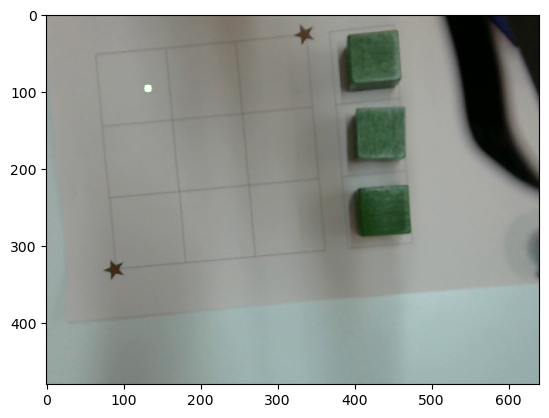

2


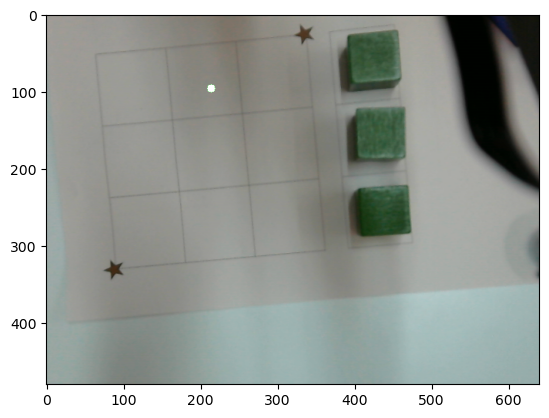

3


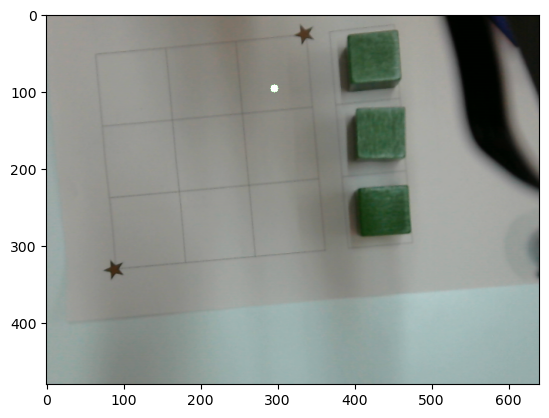

4


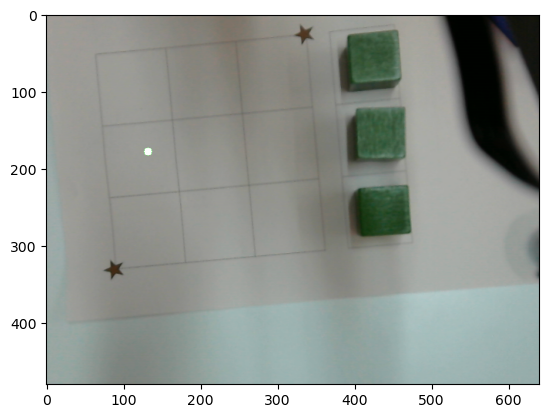

5


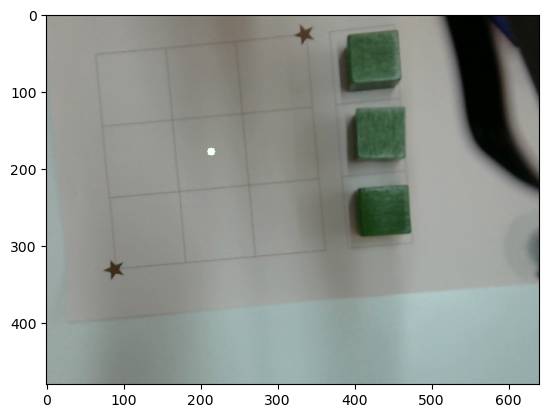

6


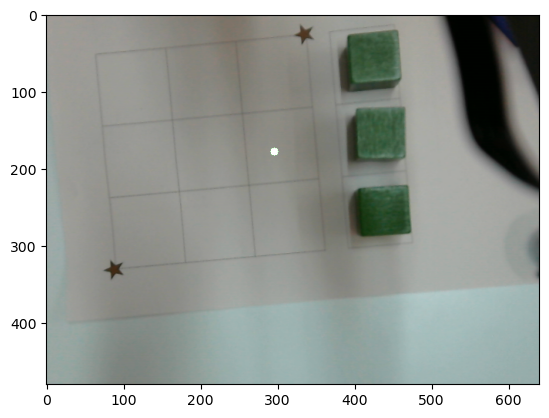

7


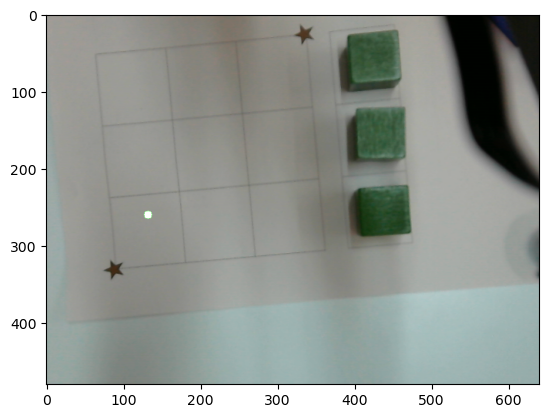

8


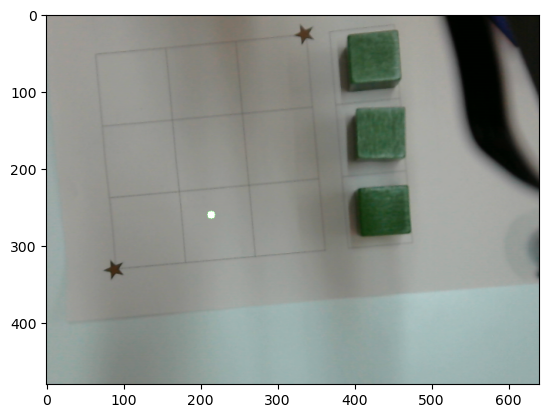

9


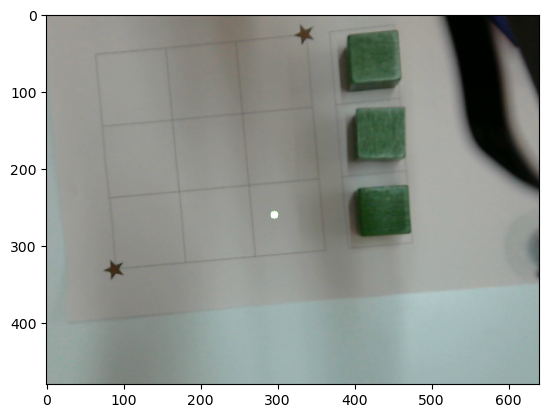

In [23]:

for idx in range(1,10):
    print(idx)
    img = draw_circle(img_with_circles, pos_cord[idx][0], pos_cord[idx][1])
    plt.imshow(img, cmap='gray')
    plt.show()

In [24]:
CON_STR = {
    dType.DobotConnect.DobotConnect_NoError:  "DobotConnect_NoError",
    dType.DobotConnect.DobotConnect_NotFound: "DobotConnect_NotFound",
    dType.DobotConnect.DobotConnect_Occupied: "DobotConnect_Occupied"}

In [25]:
#Load Dll and get the CDLL object
api = dType.load()
#建立与dobot的连接
#Connect Dobot
state = dType.ConnectDobot(api, "", 115200)[0]
print("Connect status:",CON_STR[state])

if (CON_STR[state] == "DobotConnect_NoError"):
    dType.SetQueuedCmdClear(api)
else:
    assert False

您用的dll是64位，为了顺利运行，请保证您的python环境也是64位
python环境是： ('64bit', 'WindowsPE')
Connect status: DobotConnect_NoError


In [48]:
pickupLoc = {}
refLoc = {}
homeLoc = None
globZ = None

rob_cord = {}

In [52]:
locList = ["Z", "Pickup Loc 1", "Pickup Loc 2", "Pickup Loc 3", "Pickup Loc 4", "Home", "Ref 1", "Ref 2"]

last_print = None
def print_once(str):
    global last_print
    if last_print == str:
        return
    print(str)
    last_print = str
    
def setCoordinates(locList = locList):
    global pickupLoc, refLoc, homeLoc, globZ
    prev_pose = dType.GetPose(api)
    allLoc = []
    cnt = 0
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        print_once(f"Set : {locList[cnt]}")
        if prev_pose == pose:
            continue
        prev_pose = pose
        allLoc.append(pose)
        print(f"Location set: {locList[cnt]}")
        cnt += 1
        if len(allLoc) == len(locList):
            break


    globZ = allLoc[0][2]
    pickupLoc[1] = (allLoc[1][0], allLoc[1][1], globZ) 
    pickupLoc[2] = (allLoc[2][0], allLoc[2][1], globZ) 
    pickupLoc[3] = (allLoc[3][0], allLoc[3][1], globZ)
    pickupLoc[4] = (allLoc[4][0], allLoc[4][1], globZ)
    
    homeLoc = (allLoc[5][0], allLoc[5][1], allLoc[5][2]) 
    refLoc[1] = (allLoc[6][0], allLoc[6][1]) 
    refLoc[2] = (allLoc[7][0], allLoc[7][1])

def setCoordinatesHome():
    global homeLoc
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        homeLoc = (pose[0], pose[1], pose[2])
        print(f"Location set: Home")
        break

def setCoordinatesZ():
    global globZ
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        globZ = pose[2]
        print(f"Location set: Z")
        break

def setCoordinatesRef():
    global refLoc
    if globZ == None:
        print("Set Z first")
        return 
        
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        refLoc[1] = (pose[0], pose[1], globZ)
        print(f"Location set: Ref 1")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        refLoc[2] = (pose[0], pose[1], globZ)
        print(f"Location set: Ref 2")
        break

def setCoordinatesPickup():
    global pickupLoc
    if globZ == None:
        print("Set Z first")
        return 
        
    prev_pose = dType.GetPose(api)
    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[1] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 1")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[2] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 2")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[3] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 3")
        break

    while(True):
        time.sleep(0.5)
        pose = dType.GetPose(api)
        if prev_pose == pose:
            continue
        prev_pose = pose
        pickupLoc[4] = (pose[0], pose[1], globZ)
        print(f"Location set: pickupLoc 4")
        break
        
def pick(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ-5, current_pose[3], 1)
    dType.SetEndEffectorSuctionCupEx(api, 1, 1)
    dType.dSleep(1000)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, homeLoc[0],  homeLoc[1],  homeLoc[2], current_pose[3], 1)

def drop(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+5, current_pose[3], 1)
    dType.SetEndEffectorSuctionCupEx(api, 0, 1)
    dType.dSleep(1000)
    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, homeLoc[0],  homeLoc[1],  homeLoc[2], current_pose[3], 1)

def playPiece(iteration, location):
    pickupLocation = pickupLoc[iteration]
    pick(pickupLocation)

    finalPosition = rob_cord[location]
    drop(finalPosition)

def goto(location):
    x = location[0]
    y = location[1]

    current_pose = dType.GetPose(api)
    dType.SetPTPCmdEx(api, 2, x,  y,  globZ+30, current_pose[3], 1)

In [53]:
def get_transformation_matrix(r1, r2, i1, i2):
    x_r1 = r1[0]
    y_r1 = r1[1]

'''
Based on the robot coordinate system
'''
def setCoordinatesOfCells():

    x1, y1 = refLoc[1][0], refLoc[1][1]
    x2, y2 = refLoc[2][0], refLoc[2][1]

    middle_x, middle_y = (x1 + x2) / 2, (y1 + y2) / 2

    size = abs(x1 - x2) / 3

    rob_cord[1] = ( middle_x - size, middle_y - size )
    rob_cord[2] = ( middle_x,        middle_y - size )
    rob_cord[3] = ( middle_x + size, middle_y - size )
    rob_cord[4] = ( middle_x - size, middle_y )
    rob_cord[5] = ( middle_x,        middle_y )
    rob_cord[6] = ( middle_x + size, middle_y )
    rob_cord[7] = ( middle_x - size, middle_y + size )
    rob_cord[8] = ( middle_x,        middle_y + size)
    rob_cord[9] = ( middle_x + size, middle_y + size)

    

In [54]:
setCoordinates()

Set : Z
Location set: Z
Set : Pickup Loc 1
Location set: Pickup Loc 1
Set : Pickup Loc 2
Location set: Pickup Loc 2
Set : Pickup Loc 3
Location set: Pickup Loc 3
Set : Pickup Loc 4
Location set: Pickup Loc 4
Set : Home
Location set: Home
Set : Ref 1
Location set: Ref 1
Set : Ref 2
Location set: Ref 2


In [ ]:
setCoordinatesHome()

In [64]:
setCoordinatesRef()
setCoordinatesOfCells()

Location set: Ref 1
Location set: Ref 2


In [63]:
setCoordinatesPickup()

Location set: pickupLoc 1
Location set: pickupLoc 2
Location set: pickupLoc 3
Location set: pickupLoc 4


In [ ]:
rob_cord

In [ ]:
pos = dType.GetPose(api)
x = pos[0]
y = pos[1]
z = pos[2]

print(x,y,z)

In [ ]:
refLoc

In [55]:
setCoordinatesOfCells()

In [39]:
for i in range(1,10):
    goto(rob_cord[i])
    dType.dSleep(500)

In [ ]:
playPiece(2,2)

In [65]:
def identifyColor(image, coordinates, radius=5):

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get the coordinates
    x, y = coordinates
    x = int(x)
    y = int(y)
    # Extract the region of interest (ROI) around the coordinates
    roi = hsv_image[y-radius:y+radius+1, x-radius:x+radius+1]

    # Calculate the mean HSV value of the ROI
    mean_hsv = np.mean(roi, axis=(0, 1))

    # Define HSV ranges for red, green, and blue
    red_lower1 = np.array([0, 70, 50])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([170, 70, 50])
    red_upper2 = np.array([180, 255, 255])
    green_lower = np.array([35, 50, 50])
    green_upper = np.array([85, 255, 255])
    blue_lower = np.array([100, 150, 0])
    blue_upper = np.array([140, 255, 255])

    # Check the color
    if ((red_lower1 <= mean_hsv).all() and (mean_hsv <= red_upper1).all()) or \
       ((red_lower2 <= mean_hsv).all() and (mean_hsv <= red_upper2).all()):
        color = "red"
    elif (green_lower <= mean_hsv).all() and (mean_hsv <= green_upper).all():
        color = "green"
    elif (blue_lower <= mean_hsv).all() and (mean_hsv <= blue_upper).all():
        color = "blue"
    else:
        color = "unknown"

    return color

checker = {}
checker["red"] = 'X'
checker["green"] = 'O'
checker["unknown"] = ' '

def readBoard(image):
    board = np.array([[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']])
    for x_pos in range(3):
        for y_pos in range(3):
            idx = x_pos * 3 + y_pos
            pixel_pos = pos_cord[idx+1]
            color = identifyColor(image, pixel_pos)
            # print(x_pos, y_pos, color)
            board[x_pos, y_pos] = checker[color]
    return board
    
def print_board(board):
    board_1_based = np.pad(board, ((1, 0), (1, 0)), mode='constant', constant_values=' ')
    for row in board_1_based:
        print(" | ".join(row))
        # print("-" * 5)

def waitforBoardChange():
    ret, frame = cap.read()
    prev_board = readBoard(frame)
    while(True):
        ret, frame = cap.read()
        curr = readBoard(frame)
        if (prev_board == curr).all():
            time.sleep(1)
            continue
        else:
            # print_board(prev_board)
            # print_board(curr)
            return curr, prev_board

def userMove(prev_board, curr_board):
    for x in range(3):
        for y in range(3):
            if prev_board[x][y] != curr_board[x][y]:
                return x,y

def aiMove(ai_move, ai_move_count):
    x = ai_move[0]
    y = ai_move[1]

    pos_idx = (x+1) + (y*3)
    
    playPiece(ai_move_count, pos_idx)
    

In [66]:
# waitforBoardChange()

In [70]:
# Function to print the board with 1-based indexing

# Function to check for a win
def check_winner(board):
    # Check rows for a win
    for row in board:
        if np.all(row == 'O'):
            return 'O'
        if np.all(row == 'X'):
            return 'X'
    
    # Check columns for a win
    for col in range(board.shape[1]):
        if np.all(board[:, col] == 'O'):
            return 'O'
        if np.all(board[:, col] == 'X'):
            return 'X'
    
    # Check diagonals for a win
    if np.all(np.diag(board) == 'O'):
        return 'O'
    if np.all(np.diag(board) == 'X'):
        return 'X'
    
    if np.all(np.diag(np.fliplr(board)) == 'O'):
        return 'O'
    if np.all(np.diag(np.fliplr(board)) == 'X'):
        return 'X'
    
    # Check for a draw
    # if not np.any(board == ''):
    #     return 'Draw'
    
    # No winner or draw
    return 'No Winner'

def check_winner_wrapper(board):
    winner = check_winner(board)
    if winner == 'X':
        print("You WON!!!")
    elif winner == 'O':
        print("AI wins")
    else:
        print("It's a draw")

# Function to check for a win
def check_win(board, mark):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all([board[i][j] == mark for j in range(3)]) or all([board[j][i] == mark for j in range(3)]):
            return True
    if all([board[i][i] == mark for i in range(3)]) or all([board[i][2-i] == mark for i in range(3)]):
        return True
    return False

# Function to check for a draw
def check_draw(board):
    return all([cell != ' ' for row in board for cell in row])

# Function to get the best move for the AI using minimax algorithm
def minimax(board, depth, is_maximizing):
    if check_win(board, 'O'):
        return 1
    if check_win(board, 'X'):
        return -1
    if check_draw(board):
        return 0
    
    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move
def find_best_move(board):
    best_score = -float('inf')
    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                score = minimax(board, 0, False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Function to play the game
def play_game():
    board = np.array([[' ' for _ in range(3)] for _ in range(3)])
    print("Tic Tac Toe Game")
    print_board(board)
    ai_move_count = 0
    user_move_count = 0
    while True:
        # Player's move
        curr_board, prev_board = waitforBoardChange()
        row, col = userMove(prev_board, curr_board)
        
        if board[row][col] != ' ':
            print("Invalid move! Try again.")
            continue
        board[row][col] = 'X'
        user_move_count += 1
        print_board(board)
        
        if check_win(board, 'X'):
            print_board(board)
            print("You win!")
            break
        if check_win(board, 'O'):
            print_board(board)
            print("AI win!")
            break
        if check_draw(board):
            print_board(board)
            print("It's a draw!")
            break
        
        # AI's move
        ai_move = find_best_move(board)
        board[ai_move[0]][ai_move[1]] = 'O'
        ai_move_count += 1
        aiMove(ai_move, ai_move_count)

        print_board(board)
        
        # if (user_move_count == 3 and ai_move_count == 3):
        #     check_winner_wrapper(board)
        #     break
        
        

In [71]:
play_game()

Tic Tac Toe Game
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   |  
  |   |   | X
  |   |   |  
  |   |   |  
  |   | O |  
  |   |   | X
  |   |   |  
  |   |   |  
  |   | O |  
  | X |   | X
  |   |   |  
  |   |   |  
  |   | O |  
  | X | O | X


KeyboardInterrupt: 